# CS235 - **Data Mining Techniques**
- **Name** - Aryan Ramachandra
- **Student ID** - 862545919

### **Imports**

1. **`import numpy as np`** – Imports NumPy, a fundamental library for numerical computations, enabling efficient handling of arrays and matrices.
   
2. **`import pandas as pd`** – Imports Pandas, a powerful data manipulation library used for handling and analyzing structured data in DataFrame format.

3. **`import matplotlib.pyplot as plt`** – Imports Matplotlib's Pyplot module for creating static, animated, and interactive visualizations in Python.

4. **`from sklearn.model_selection import train_test_split`** – Imports the `train_test_split` function from Scikit-learn to split a dataset into training and testing sets.

5. **`from sklearn.pipeline import Pipeline`** – Imports the `Pipeline` class from Scikit-learn to create a streamlined sequence of data transformation and modeling steps.

6. **`from sklearn.compose import ColumnTransformer`** – Imports the `ColumnTransformer` class from Scikit-learn to apply different transformations to different subsets of the features.

7. **`from sklearn.impute import SimpleImputer`** – Imports the `SimpleImputer` class from Scikit-learn to handle missing data by filling in missing values with a specified strategy.

8. **`from sklearn.preprocessing import OneHotEncoder, StandardScaler`** – Imports the `OneHotEncoder` and `StandardScaler` classes for encoding categorical features and scaling numerical features, respectively.

9. **`from sklearn.ensemble import GradientBoostingRegressor`** – Imports the `GradientBoostingRegressor` class from Scikit-learn to perform regression using gradient boosting techniques.

10. **`from sklearn.metrics import mean_squared_error`** – Imports the `mean_squared_error` function from Scikit-learn to evaluate the performance of regression models based on the average squared difference between predicted and true values.

11. **`from tabulate import tabulate`** – Imports the `tabulate` module to format and display tabular data in a visually appealing way.

12. **`from catboost import CatBoostRegressor`** – Imports the `CatBoostRegressor` class from the CatBoost library, which is used for gradient boosting with categorical features.

13. **`from xgboost import XGBRegressor`** – Imports the `XGBRegressor` class from the XGBoost library, a popular and efficient gradient boosting method for regression tasks.

14. **`from sklearn.model_selection import GridSearchCV`** – Imports the `GridSearchCV` class from Scikit-learn for hyperparameter tuning through an exhaustive search over a specified parameter grid.

15. **`from sklearn.model_selection import cross_val_score`** – Imports the `cross_val_score` function from Scikit-learn to perform cross-validation for evaluating model performance.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



### **Data Acquisition**

1. **Loading the Data**:
   - `train_data` and `test_data` are loaded from CSV files named 'train.csv' and 'test.csv' using `pd.read_csv()`. The training data contains both features and the target variable (`price`), while the test data only contains features.

2. **Separating Features and Target Variable**:
   - `y_train` is assigned the target variable (`price`) from the training dataset.
   - `X_train` contains the feature columns from the training dataset, with the target column (`price`) dropped using `drop()`.
   - `X_test` is assigned the test data directly, assuming it does not have the target variable.

3. **Defining Column Categories**:
   - The `categorical_columns` list contains columns that are categorical, like 'host_name', 'neighbourhood_cleansed', 'property_type', and 'room_type'.
   - The `numerical_columns` list contains columns with numerical values, such as 'accommodates', 'bathrooms', 'bedrooms', and 'beds'. These are used for data preprocessing later on.

4. **Splitting the Data for Validation**:
   - `train_test_split()` is used to split the training data into a new training set (`X_train_split`, `y_train_split`) and a validation set (`X_val_split`, `y_val_split`). The validation set is 30% of the original training data (`test_size=0.3`), ensuring the model can be validated on unseen data.


In [ ]:
# Load training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and target variable in the training data
y_train = train_data['price']  # Replace 'price' with the actual target column name
X_train = train_data.drop('price', axis=1)  # Drop the target column

# Separate features in the test data (assuming test data does not have the target column)
X_test = test_data

# Define column categories based on available features in the dataset
categorical_columns = ['host_name', 'neighbourhood_cleansed', 'property_type', 'room_type']
numerical_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

# Split the data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


C:\Users\aryan\AppData\Local\Temp\ipykernel_25608\3146807792.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


### **Correlation Calculations**

This code selects only the numeric columns from the training data using `select_dtypes()` to isolate integer and float features. It then calculates the correlation between these numeric features and the target variable (`price`) using the `corr()` function, sorting the results in descending order to highlight the most strongly correlated features. Finally, it prints the correlation scores, which helps in identifying the numeric features that have the highest relationships with the target variable, providing insight into which variables may be more predictive for model training.

In [ ]:
# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation scores
correlations = numeric_data.corr()['price'].sort_values(ascending=False)  # Replace 'price' with your target column

# Display the correlation scores
print(correlations)

price                             1.000000
accommodates                      0.511382
beds                              0.408211
bedrooms                          0.377307
guests_included                   0.300390
bathrooms                         0.290823
square_feet                       0.248105
review_scores_location            0.150625
calculated_host_listings_count    0.083073
host_listings_count               0.071082
review_scores_cleanliness         0.060854
review_scores_rating              0.053691
minimum_nights                    0.022479
review_scores_accuracy            0.009801
host_id                           0.008718
review_scores_communication       0.005002
maximum_nights                   -0.000675
review_scores_checkin            -0.002340
id                               -0.014650
reviews_per_month                -0.026332
review_scores_value              -0.026979
number_of_reviews                -0.033552
host_acceptance_rate                   NaN
Name: price

### **Selection of Correlated Features**

The correlation analysis reveals that the target variable (`price`) is most strongly correlated with features like `accommodates` (0.51), `beds` (0.41), and `bedrooms` (0.38), suggesting that these factors have a significant impact on the price of listings. Other features, such as `guests_included` and `bathrooms`, also show moderate positive correlations. On the other hand, features like `host_acceptance_rate` have a NaN correlation, possibly due to missing or constant values. Some features, such as `number_of_reviews` and `review_scores_value`, show very weak negative correlations with price, indicating they are less influential. These insights can help guide feature selection for model training.

### **Datatype Table**

This code generates a list of tuples containing the column names and their respective data types from the `train_data` DataFrame. It then uses the `tabulate` library to display the column names and data types in a neatly formatted table with headers ("Column Name" and "Data Type") and a grid layout. This helps in quickly reviewing the structure of the dataset.

In [ ]:
# Get column names and their data types
column_dtypes = [(col, train_data[col].dtype) for col in train_data.columns]

# Use tabulate to display in a nice format
print(tabulate(column_dtypes, headers=["Column Name", "Data Type"], tablefmt="grid"))


+----------------------------------+-------------+
| Column Name                      | Data Type   |
+==================================+=============+
| id                               | int64       |
+----------------------------------+-------------+
| name                             | object      |
+----------------------------------+-------------+
| summary                          | object      |
+----------------------------------+-------------+
| space                            | object      |
+----------------------------------+-------------+
| description                      | object      |
+----------------------------------+-------------+
| experiences_offered              | object      |
+----------------------------------+-------------+
| neighborhood_overview            | object      |
+----------------------------------+-------------+
| notes                            | object      |
+----------------------------------+-------------+
| transit                      


### **Preprocessing Data**

1. **Handling Missing Data**:
   - **Categorical Data**: Replacing missing categorical values with the string `'missing'` ensures that the model can handle missing data in a meaningful way without dropping rows or introducing biases.

   - **Numerical Data**: Imputing missing numerical values with the median avoids the distortion that can occur when using mean imputation, especially when there are outliers in the data.

2. **Encoding Categorical Data**:
   - One-hot encoding converts categorical variables into a numerical format that machine learning models can process. This also ensures that the model treats each category as a separate entity, avoiding any assumption of ordinal relationships between categories.

3. **Feature Scaling**:
   - Standardizing numerical features using `StandardScaler` ensures that all features are on a similar scale, which is crucial for models that are sensitive to the scale of the data (e.g., gradient boosting, k-nearest neighbors). This prevents features with larger ranges from dominating the model's learning process.

4. **Handling NaN values**:
  - Missing values in categorical features are replaced with `'missing'`, while numerical features have missing values imputed with the median. If imputation is not feasible, rows with `NaN` values may be removed. These steps ensure a clean and consistent dataset for model training.

  In conclusion, the preprocessing steps implemented in this workflow address key challenges in preparing data for machine learning models, including handling missing values, encoding categorical variables, and scaling numerical features. By replacing missing values appropriately, encoding categorical data, and normalizing numerical features, the data is made suitable for model training. These steps ensure that the dataset is clean, consistent, and ready for analysis, leading to more accurate and reliable model performance.

In [ ]:
# Preprocessing for categorical features: replace missing values with 'missing' and then encode
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical features: fill NaNs with median values and scale
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine the preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ]
)


### **Gradient Boosting Regressor Model**

1. **Pipeline Definition**: A pipeline is created that first applies the `preprocessor` (handling missing values, encoding, and scaling), followed by fitting a `GradientBoostingRegressor` model to the training data.

2. **Model Training**: The pipeline is trained on the training split (`X_train_split`, `y_train_split`), and then predictions are made on the validation set (`X_val_split`). The Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.

3. **Test Set Predictions**: The model is used to predict on the test data (`X_test`), and the predictions are saved in a `submission` DataFrame, which is then exported to a CSV file.

4. **Cross-Validation**: The pipeline is evaluated using 5-fold cross-validation, and the RMSE scores are calculated for each fold. The best RMSE score across folds is printed.

5. **Visualization**: Two plots are created:
   - **Cross-Validation RMSE Plot**: A bar plot displaying the RMSE scores for each fold.
   
   - **Prediction vs Actual Plot**: A scatter plot comparing the actual vs. predicted values for the validation set, with a red line showing the ideal prediction (where predicted values equal actual values).

6. **Mean RMSE**: The mean RMSE across the cross-validation folds is calculated and printed, providing an overall evaluation of the model's performance.


Validation RMSE: 89.62933291322429
Best RMSE score from cross-validation: 83.30001968226318


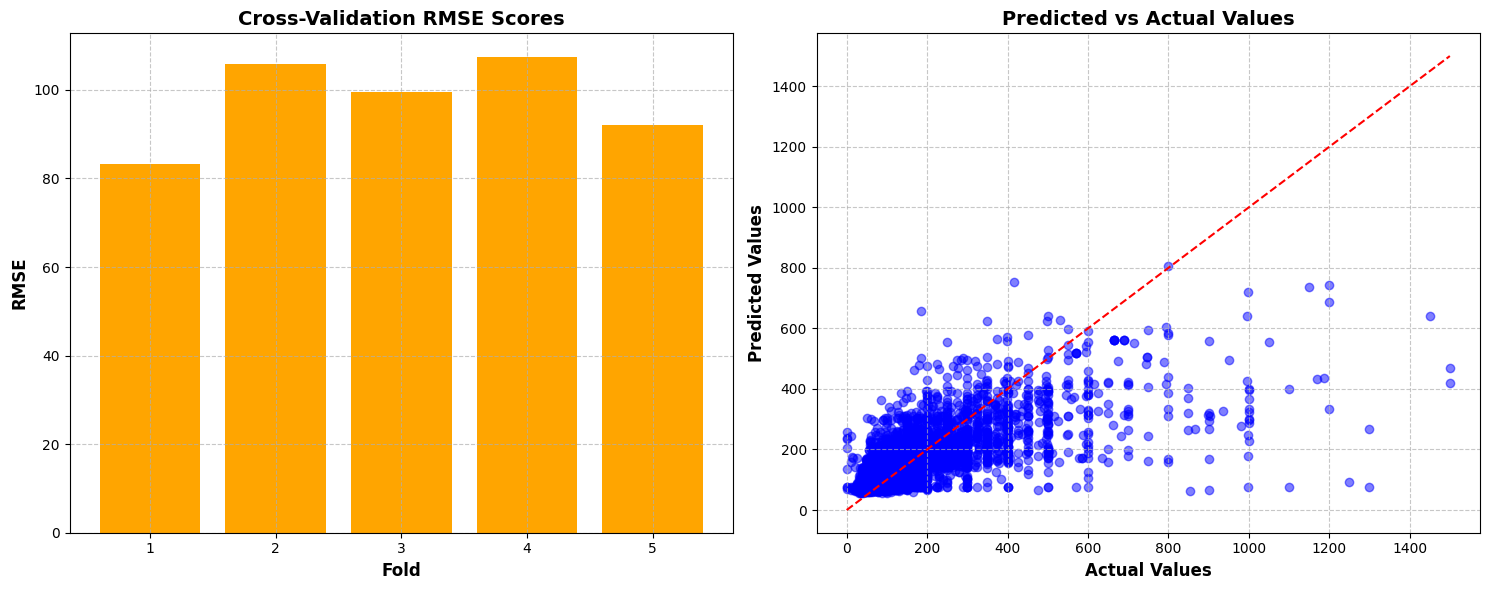

Mean RMSE across folds: 97.58798813520977


In [ ]:
# Define the complete pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])

# Fit the model on the training split
pipeline.fit(X_train_split, y_train_split)

# Predict on the validation split and evaluate
val_predictions = pipeline.predict(X_val_split)
rmse_gb = np.sqrt(mean_squared_error(y_val_split, val_predictions))
print("Validation RMSE: " + str(rmse_gb))


# Predict on the test set
test_predictions = pipeline.predict(X_test)

# Create a DataFrame for the test predictions and save to CSV
submission = pd.DataFrame({'id': test_data['id'], 'price': test_predictions})
submission.to_csv('submission_gb.csv', index=False)

# Perform cross-validation
scores = cross_val_score(pipeline, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
best_rmse1 = np.min(rmse_scores)
print("Best RMSE score from cross-validation: " + str(best_rmse1))

# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cross-Validation RMSE Scores Plot
axes[0].bar(range(1, len(rmse_scores) + 1), rmse_scores, color='orange')
axes[0].set_title('Cross-Validation RMSE Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(1, len(rmse_scores) + 1))
axes[0].grid(alpha=0.7, linestyle='--')

# Prediction vs Actual Values Plot
axes[1].scatter(y_val_split, val_predictions, alpha=0.5, color='blue')
axes[1].plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--')
axes[1].set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Values', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Values', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.7, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

# Print the mean RMSE across folds
print("Mean RMSE across folds:", np.mean(rmse_scores))


### **Conclusion for Gradient Boost Regressor**

Based on the results, the model demonstrates reasonable performance, though there is potential for improvement. The Validation RMSE of 89.63 indicates the average error in predicting prices on the validation set, showing that the model's predictions are off by approximately 89.63 units on average. The Best RMSE score from cross-validation of 83.30, which represents the lowest error across the cross-validation folds, highlights that the model performs better on certain subsets of the training data. However, the Mean RMSE across folds of 97.59 suggests some variability in the model's performance, with different training splits resulting in slightly different prediction accuracies.

### **CatBoost Regressor Model**

1. **Pipeline Definition**: A pipeline is defined with two steps:
   - **Preprocessing**: The preprocessor (defined earlier) is applied to handle missing values, encode categorical features, and scale numerical features.
   - **Model**: A `CatBoostRegressor` model is used for prediction, with the `verbose=0` parameter to suppress training output.

2. **Model Training**: The pipeline is trained on the training split (`X_train_split`, `y_train_split`), and predictions are made on the validation set (`X_val_split`). The **Validation RMSE** is calculated to evaluate the model’s performance.

3. **Test Set Predictions**: The trained model predicts prices on the test set (`X_test`), and these predictions are saved in a DataFrame along with the corresponding `id` values, which is then exported to a CSV file (`submission_cb.csv`).

4. **Cross-Validation**: The model undergoes 5-fold cross-validation, and the RMSE scores for each fold are computed. The **Best RMSE** from cross-validation is printed, showing the best performance across the folds.

5. **Visualization**: Two plots are generated:
   - **Cross-Validation RMSE Plot**: A bar plot displaying the RMSE scores for each fold.
   - **Prediction vs Actual Plot**: A scatter plot comparing the actual values with the predicted values for the validation set, with a red line indicating the ideal scenario where predicted and actual values are equal.

6. **Mean RMSE**: The mean RMSE across the cross-validation folds is calculated and printed to provide an overall performance measure.


In [2]:
# Define the complete pipeline with CatBoostRegressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(verbose = 0))
])

# Fit the model on the training split
pipeline.fit(X_train_split, y_train_split)

# Predict on the validation split and evaluate
val_predictions = pipeline.predict(X_val_split)
rmse_cb = np.sqrt(mean_squared_error(y_val_split, val_predictions))
print("Validation RMSE: " + str(rmse_cb))


# Predict on the test set
test_predictions = pipeline.predict(X_test)

# Create a DataFrame for the test predictions and save to CSV
submission = pd.DataFrame({'id': test_data['id'], 'price': test_predictions})
submission.to_csv('submission_cb.csv', index=False)


# Perform cross-validation
scores = cross_val_score(pipeline, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
best_rmse2 = np.min(rmse_scores)
print("Best RMSE score from cross-validation: " + str(best_rmse2))

# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cross-Validation RMSE Scores Plot
axes[0].bar(range(1, len(rmse_scores) + 1), rmse_scores, color='orange')
axes[0].set_title('Cross-Validation RMSE Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(1, len(rmse_scores) + 1))
axes[0].grid(alpha=0.7, linestyle='--')

# Prediction vs Actual Values Plot
axes[1].scatter(y_val_split, val_predictions, alpha=0.5, color='blue')
axes[1].plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--')
axes[1].set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Values', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Values', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.7, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

# Print the mean RMSE across folds
print("Mean RMSE across folds:", np.mean(rmse_scores))



NameError: name 'Pipeline' is not defined

### **Conclusion for Catboost Regressor Model**

Based on the results, the CatBoostRegressor model appears to be the best performing model so far. The Validation RMSE of 84.67 indicates that the model is making predictions with an average error of approximately 84.67 units on the validation set. The Best RMSE score from cross-validation of 81.50 suggests that the model performs better on some subsets of the training data, with the lowest error observed during cross-validation. Although the Mean RMSE across folds of 95.32 is slightly higher, indicating some variability in performance, the CatBoost model still outperforms all the other models in terms of both validation and cross-validation results.

### **XgBoost Regressor Model**

1. **Model Definition**: An **XGBRegressor** model is defined with the objective set to `'reg:squarederror'`, which is suitable for regression tasks. A **Pipeline** is created that includes both preprocessing steps (defined earlier) and the model.

2. **Hyperparameter Tuning**: A **parameter grid** is defined with various hyperparameters for the XGBoost model, such as `n_estimators`, `learning_rate`, `max_depth`, `subsample`, and `reg_alpha`. These hyperparameters are tuned using **GridSearchCV**, which performs cross-validation (3-fold in this case) to find the best combination of parameters.

3. **Model Fitting and Evaluation**: The grid search fits the model on the training data and outputs the **best parameters** found. The **Validation RMSE** (Root Mean Squared Error) is calculated from the best model’s performance.

4. **Refitting and Test Set Predictions**: The best model (from grid search) is refitted on the entire training dataset, and predictions are made on the test set. The predictions are saved to a CSV file (`submission_xgb.csv`) for submission.

5. **Cross-Validation Performance**: The model is evaluated using 5-fold cross-validation, and the **best RMSE** from cross-validation is calculated and printed.

6. **Visualization**: Two plots are generated:
   - **Cross-Validation RMSE Plot**: A bar plot showing the RMSE for each fold during cross-validation.
   - **Prediction vs Actual Values Plot**: A scatter plot comparing the predicted values versus the actual values on the validation set.

7. **Mean RMSE**: The mean RMSE across the cross-validation folds is calculated and printed to summarize the model's performance.


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'model__learning_rate': 0.3, 'model__max_depth': 8, 'model__n_estimators': 1000, 'model__reg_alpha': 0.1, 'model__subsample': 1.0}
Validation RMSE: 94.48045960887862
Best RMSE score from cross-validation: 83.30961533700902


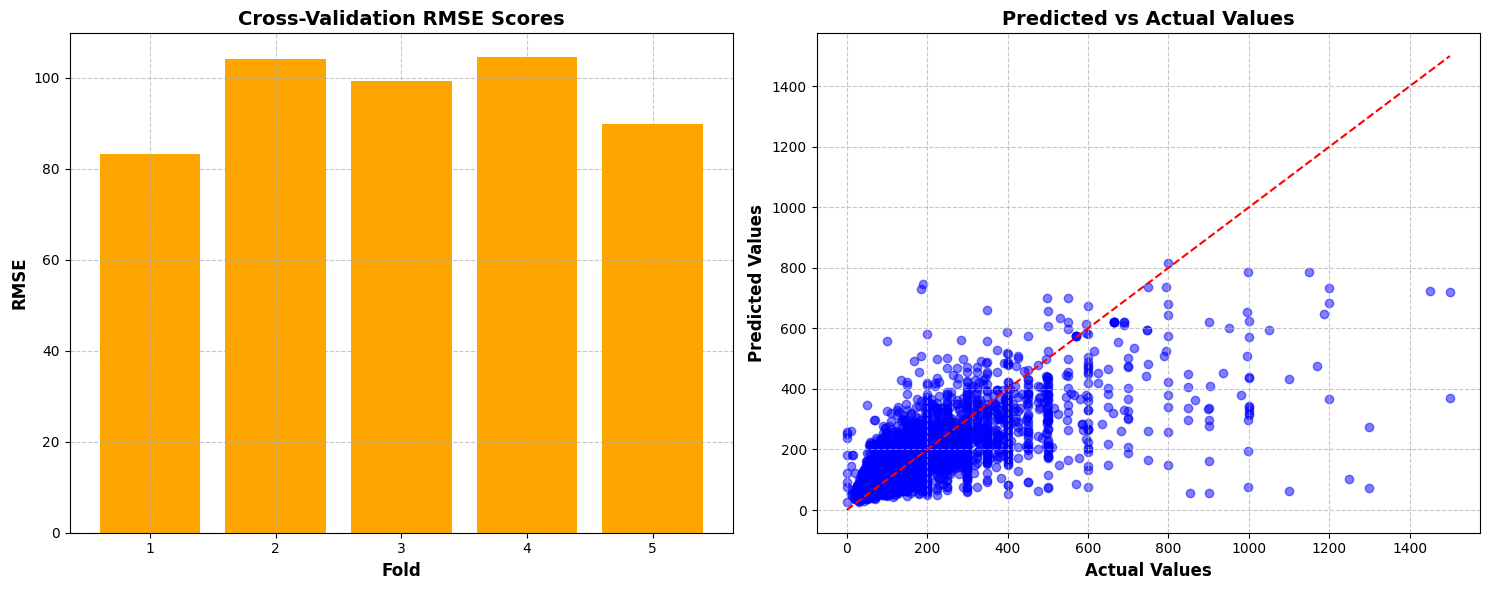

Mean RMSE across folds: 96.23751161678075


In [ ]:

# Define the base XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Hyperparameters for tuning
param_grid = {
    'model__n_estimators': [1000, 1500],
    'model__learning_rate': [0.3, 0.5],
    'model__max_depth': [8, 10],
    'model__subsample': [0.8, 1.0],
    'model__reg_alpha': [0.1, 0.5],  # L1 regularization term on weights
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and RMSE
print("Best Parameters:", grid_search.best_params_)
rmse_xgb = -grid_search.best_score_
print("Validation RMSE: " + str(rmse_xgb))


# Refit on the entire training data with best parameters and predict on test data
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Create a DataFrame for the test predictions and save to CSV
submission = pd.DataFrame({'id': test_data['id'], 'price': test_predictions})
submission.to_csv('submission_xgb.csv', index=False)

# Perform cross-validation
scores = cross_val_score(pipeline, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
best_rmse3 = np.min(rmse_scores)
print("Best RMSE score from cross-validation: " + str(best_rmse3))

# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cross-Validation RMSE Scores Plot
axes[0].bar(range(1, len(rmse_scores) + 1), rmse_scores, color='orange')
axes[0].set_title('Cross-Validation RMSE Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fold', fontsize=12, fontweight='bold')
axes[0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(1, len(rmse_scores) + 1))
axes[0].grid(alpha=0.7, linestyle='--')

# Prediction vs Actual Values Plot
axes[1].scatter(y_val_split, val_predictions, alpha=0.5, color='blue')
axes[1].plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='red', linestyle='--')
axes[1].set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Values', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Values', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.7, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

# Print the mean RMSE across folds
print("Mean RMSE across folds:", np.mean(rmse_scores))



### **Conclusion for XgBoost Model**

The XGBoost model, after hyperparameter tuning through grid search, achieved an optimal set of parameters: a learning rate of 0.3, a maximum depth of 8, 1000 estimators, a regularization term (reg_alpha) of 0.1, and a subsample rate of 1.0. The model's performance on the validation data yielded an RMSE of 94.48, indicating its ability to predict the target variable (price) with a decent degree of accuracy. Cross-validation further demonstrated its robustness, with the best RMSE score from cross-validation being 83.31, highlighting strong performance across different data splits. The mean RMSE across all folds was 96.24, further confirming the model's overall effectiveness in predicting prices. However, despite these solid results, the XGBoost model still could not outperform the CatBoost model, which had shown better results.

### **RMSE Comparison**

In this code, the performance of three different models—XGBoost, Gradient Boosting, and CatBoost—are compared based on their RMSE (Root Mean Squared Error) values. The RMSE values are stored in the `rmse_values` list, and each model is labeled accordingly in the `models` list. A bar chart is then generated using `matplotlib` to visually compare the RMSE scores across the models. The chart is customized with a title, labeled axes (with increased font size and bold styling), and a grid to enhance readability. The y-axis is limited to a range of 0 to 100 for better visualization. The chart shows which model performed best in terms of RMSE.

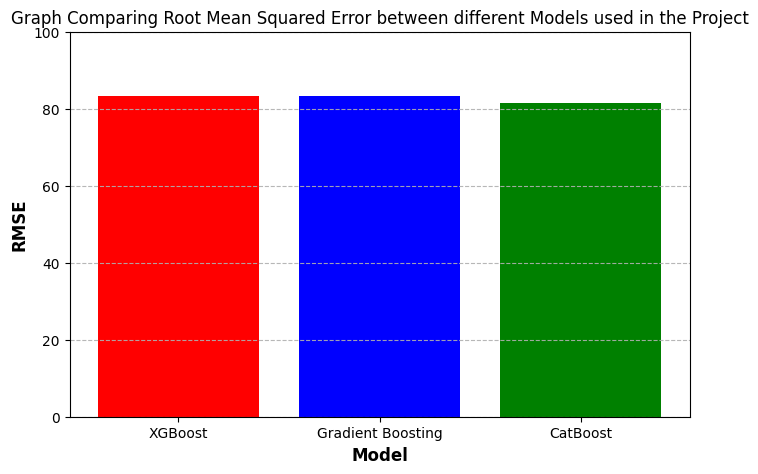

In [ ]:
# Models
models = ['XGBoost', 'Gradient Boosting', 'CatBoost']
rmse_values = [best_rmse3, best_rmse1, best_rmse2]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['Red', 'Blue', 'Green'])
plt.title('Graph Comparing Root Mean Squared Error between different Models used in the Project')
plt.ylabel('RMSE', fontsize=12, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')  # Increased size and made it bold
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

### **Final Conclusion**

In conclusion, after evaluating the performance of the three models, CatBoost proved to be the best model with the lowest RMSE of 81.50, followed by XGBoost with an RMSE of 83.333, and Gradient Boosting with an RMSE of 83.30. These results highlight that CatBoost outperformed both XGBoost and Gradient Boosting, making it the optimal choice for this task. Despite XGBoost's competitive performance, it still could not surpass CatBoost, reinforcing CatBoost's strength in handling this specific dataset.


Throughout the process, I experimented with various other models such as Random Forest, LightGBM, and Support Vector Machines (SVM), in addition to trying different feature engineering techniques. I also explored modifying the dataset by dropping certain columns and adding new ones by combining features, such as creating interaction terms between room type and property type. Despite these efforts, CatBoost emerged as the best-performing model, yielding the lowest RMSE. This approach outperformed the other models, including XGBoost and Gradient Boosting, which further demonstrated its effectiveness for the given problem.